<a href="https://colab.research.google.com/github/BianchiLuca28/FHNW-BI-LMS/blob/main/notebooks/notebook1_luca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Importing dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = "/content/drive/MyDrive/__Shared/BI"

In [4]:
df = pd.read_csv(folder_path + "/flattened_dataset.csv")
df.head()

,shipment_id,customer_price,expected_carrier_price,final_carrier_price,weight,shipment_type,insurance_type,customer_id,domain_name,booking_state,...,month_delivery_date,quarter_delivery_date,full_date_real_pickup_date,year_real_pickup_date,month_real_pickup_date,quarter_real_pickup_date,full_date_real_delivery_date,year_real_delivery_date,month_real_delivery_date,quarter_real_delivery_date
0,4499940,8.64,5.92,4.96,1.5,Parcel,No_Insurance,20378,DE,12,...,11.0,4.0,2023-01-10,2023,1,1,2023-01-11,2023,1,1
1,4505367,19.24,10.93,8.47,18.0,Parcel,No_Insurance,80847,DE,12,...,12.0,4.0,2023-01-03,2023,1,1,2023-01-04,2023,1,1
2,4536217,19.16,10.89,8.46,18.0,Parcel,No_Insurance,80847,DE,12,...,12.0,4.0,2023-01-03,2023,1,1,2023-01-04,2023,1,1
3,4554860,99.04,62.09,59.15,3.2,Parcel,No_Insurance,157579,DE,12,...,12.0,4.0,2023-01-05,2023,1,1,2023-01-28,2023,1,1
4,4557691,6.70,5.88,4.63,2.0,Parcel,No_Insurance,66718,DE,12,...,1.0,1.0,2022-12-20,2022,12,4,2022-12-21,2022,12,4


# Exploratory Data Analysis (EDA)

### Basic Data Exploration

In [16]:
# Basic Data Overview
print("Dataset Overview:")
display(df.head())

# Summary statistics for numerical features
print("\nSummary Statistics:")
display(df.describe())

# Data types and missing value counts
print("\nData Types and Missing Values:")
print(df.dtypes)
print("\nMissing Values Count:")
print(df.isnull().sum())

Dataset Overview:


,customer_price,expected_carrier_price,weight,shipment_type,insurance_type,customer_id,domain_name,booking_state,created_date,structure_number,...,name_pickup_country,iso_country_code_pickup_country,continent_pickup_country,EU_pickup_country,service_type,domain_name_carrier,full_date_created_date,year_created_date,month_created_date,quarter_created_date
0,8.64,5.92,1.5,Parcel,No_Insurance,20378,DE,12,2014-05-14,119217,...,Germany,DE,Europe,1.0,3,DE,2022-11-25,2022,11,4
1,19.24,10.93,18.0,Parcel,No_Insurance,80847,DE,12,2018-07-09,124744,...,Germany,DE,Europe,1.0,3,DE,2022-11-29,2022,11,4
2,19.16,10.89,18.0,Parcel,No_Insurance,80847,DE,12,2018-07-09,124744,...,Germany,DE,Europe,1.0,3,DE,2022-12-12,2022,12,4
3,99.04,62.09,3.2,Parcel,No_Insurance,157579,DE,12,2022-04-28,143957,...,China,CN,Asia,0.0,0,DE,2022-12-19,2022,12,4
4,6.70,5.88,2.0,Parcel,No_Insurance,66718,DE,12,2017-10-23,130680,...,Germany,DE,Europe,1.0,3,DE,2022-12-20,2022,12,4



Summary Statistics:


,customer_price,expected_carrier_price,weight,customer_id,booking_state,structure_number,EU_pickup,EU_pickup_country,service_type,year_created_date,month_created_date,quarter_created_date
count,656802.000000,656802.000000,656802.000000,656802.000000,656802.000000,656802.000000,656802.000000,656802.000000,656802.000000,656802.000000,656802.000000,656802.000000
mean,46.457547,30.194389,11.075398,77202.130639,12.000257,180950.848231,0.873246,0.873246,1.575058,2022.999562,6.491274,2.492058
std,109.466604,73.354634,33.553862,50912.392470,0.045117,124221.485764,0.332697,0.332697,1.480215,0.022546,3.432599,1.123129
min,-24.210000,-119.930000,0.010000,1.000000,7.000000,10000.000000,0.000000,0.000000,0.000000,2022.000000,1.000000,1.000000
25%,9.530000,6.630000,1.180000,33531.000000,12.000000,118784.000000,1.000000,1.000000,0.000000,2023.000000,3.000000,1.000000
50%,20.020000,13.010000,3.500000,68430.000000,12.000000,129718.000000,1.000000,1.000000,3.000000,2023.000000,6.000000,2.000000
75%,45.170000,28.110000,10.590000,123446.000000,12.000000,143681.000000,1.000000,1.000000,3.000000,2023.000000,10.000000,4.000000
max,10966.180000,7963.940000,3315.000000,177551.000000,19.000000,501779.000000,1.000000,1.000000,4.000000,2024.000000,12.000000,4.000000



Data Types and Missing Values:
customer_price                     float64
expected_carrier_price             float64
weight                             float64
shipment_type                       object
insurance_type                      object
customer_id                          int64
domain_name                         object
booking_state                        int64
created_date                        object
structure_number                     int64
is_master                             bool
domain_name_delivery                object
name_pickup                         object
iso_country_code_pickup             object
continent_pickup                    object
EU_pickup                          float64
created_date_pickup                 object
domain_name_pickup                  object
name_pickup_country                 object
iso_country_code_pickup_country     object
continent_pickup_country            object
EU_pickup_country                  float64
service_type          

### Missing Values Analysis

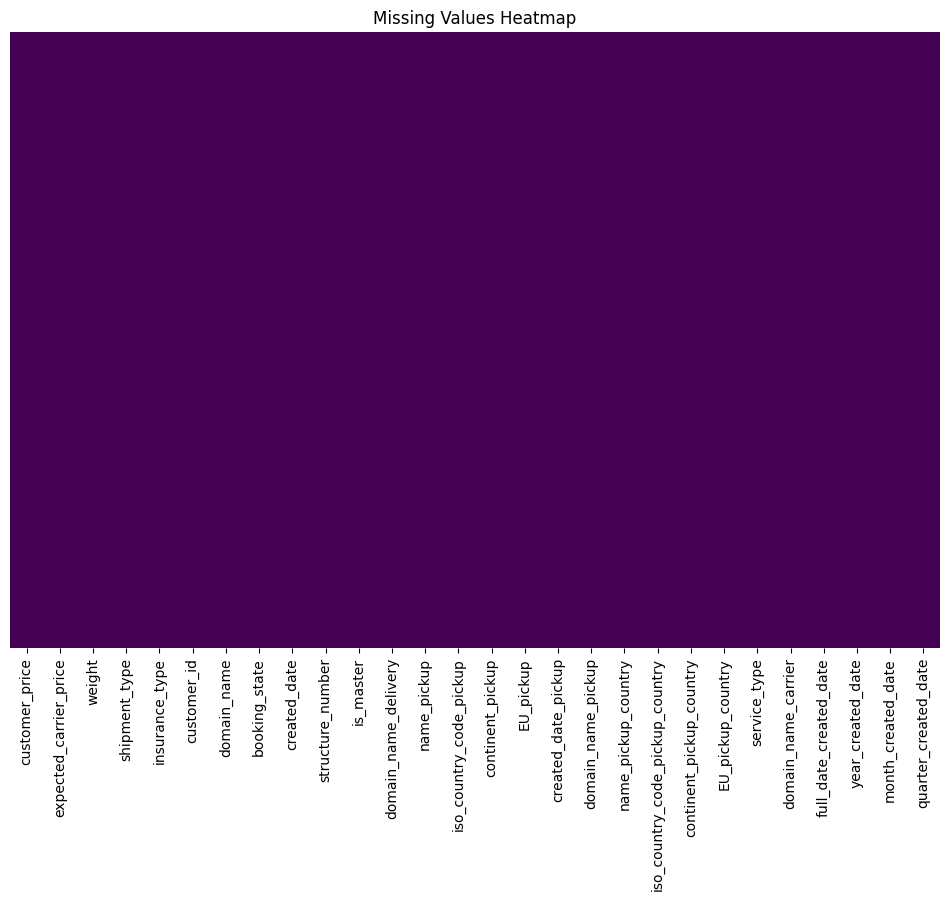

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### Correlation Heatmap for Numerical Features

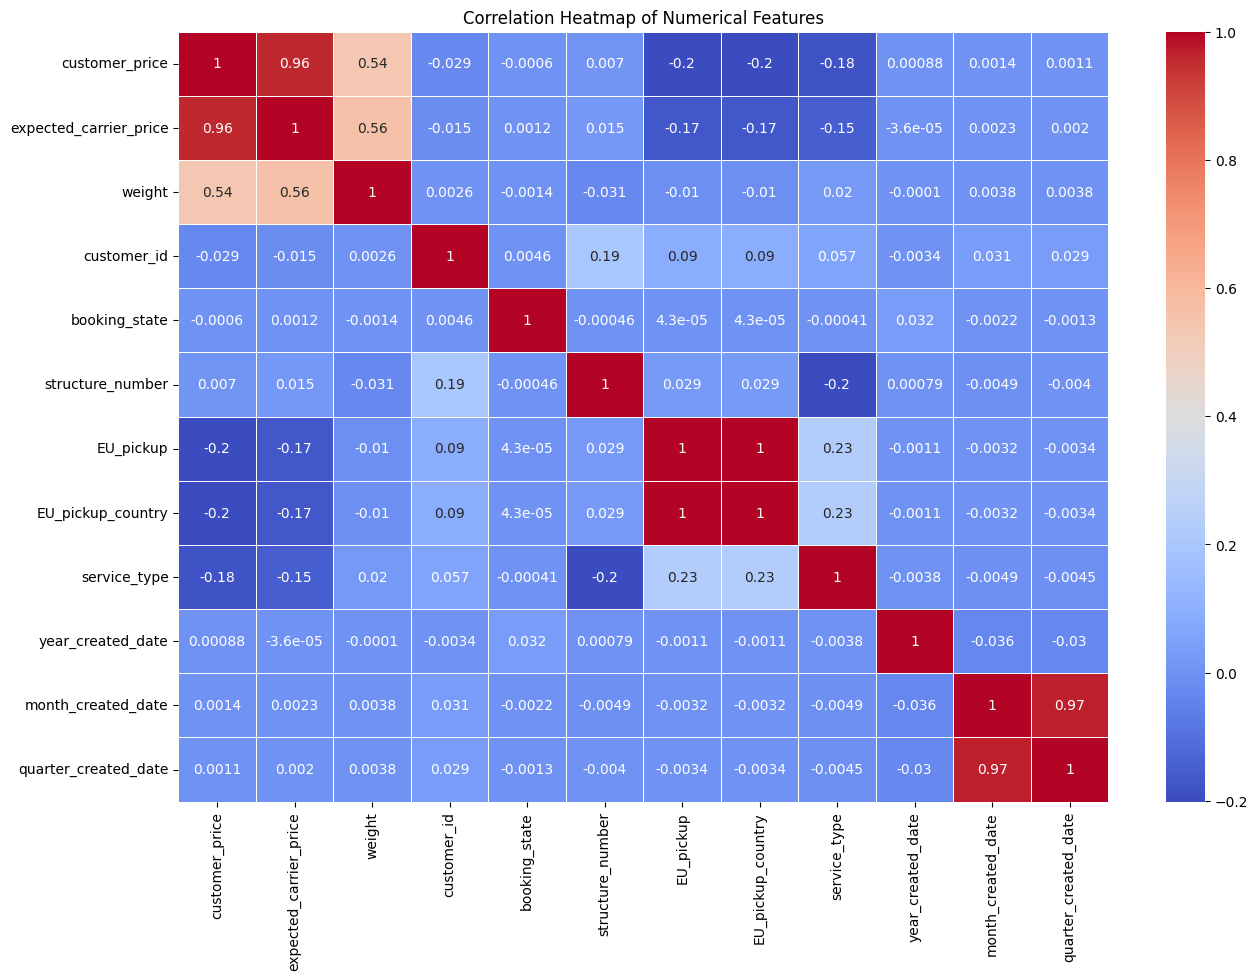

In [19]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Visualizing Feature Distributions

In [ ]:
# Plot distribution for each numerical feature
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()


### Box Plots for Outlier Detection

In [ ]:
# Box plot for outlier detection in each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Box Plot for {feature} (Outlier Detection)")
    plt.xlabel(feature)
    plt.show()


### Feature Interaction Plots

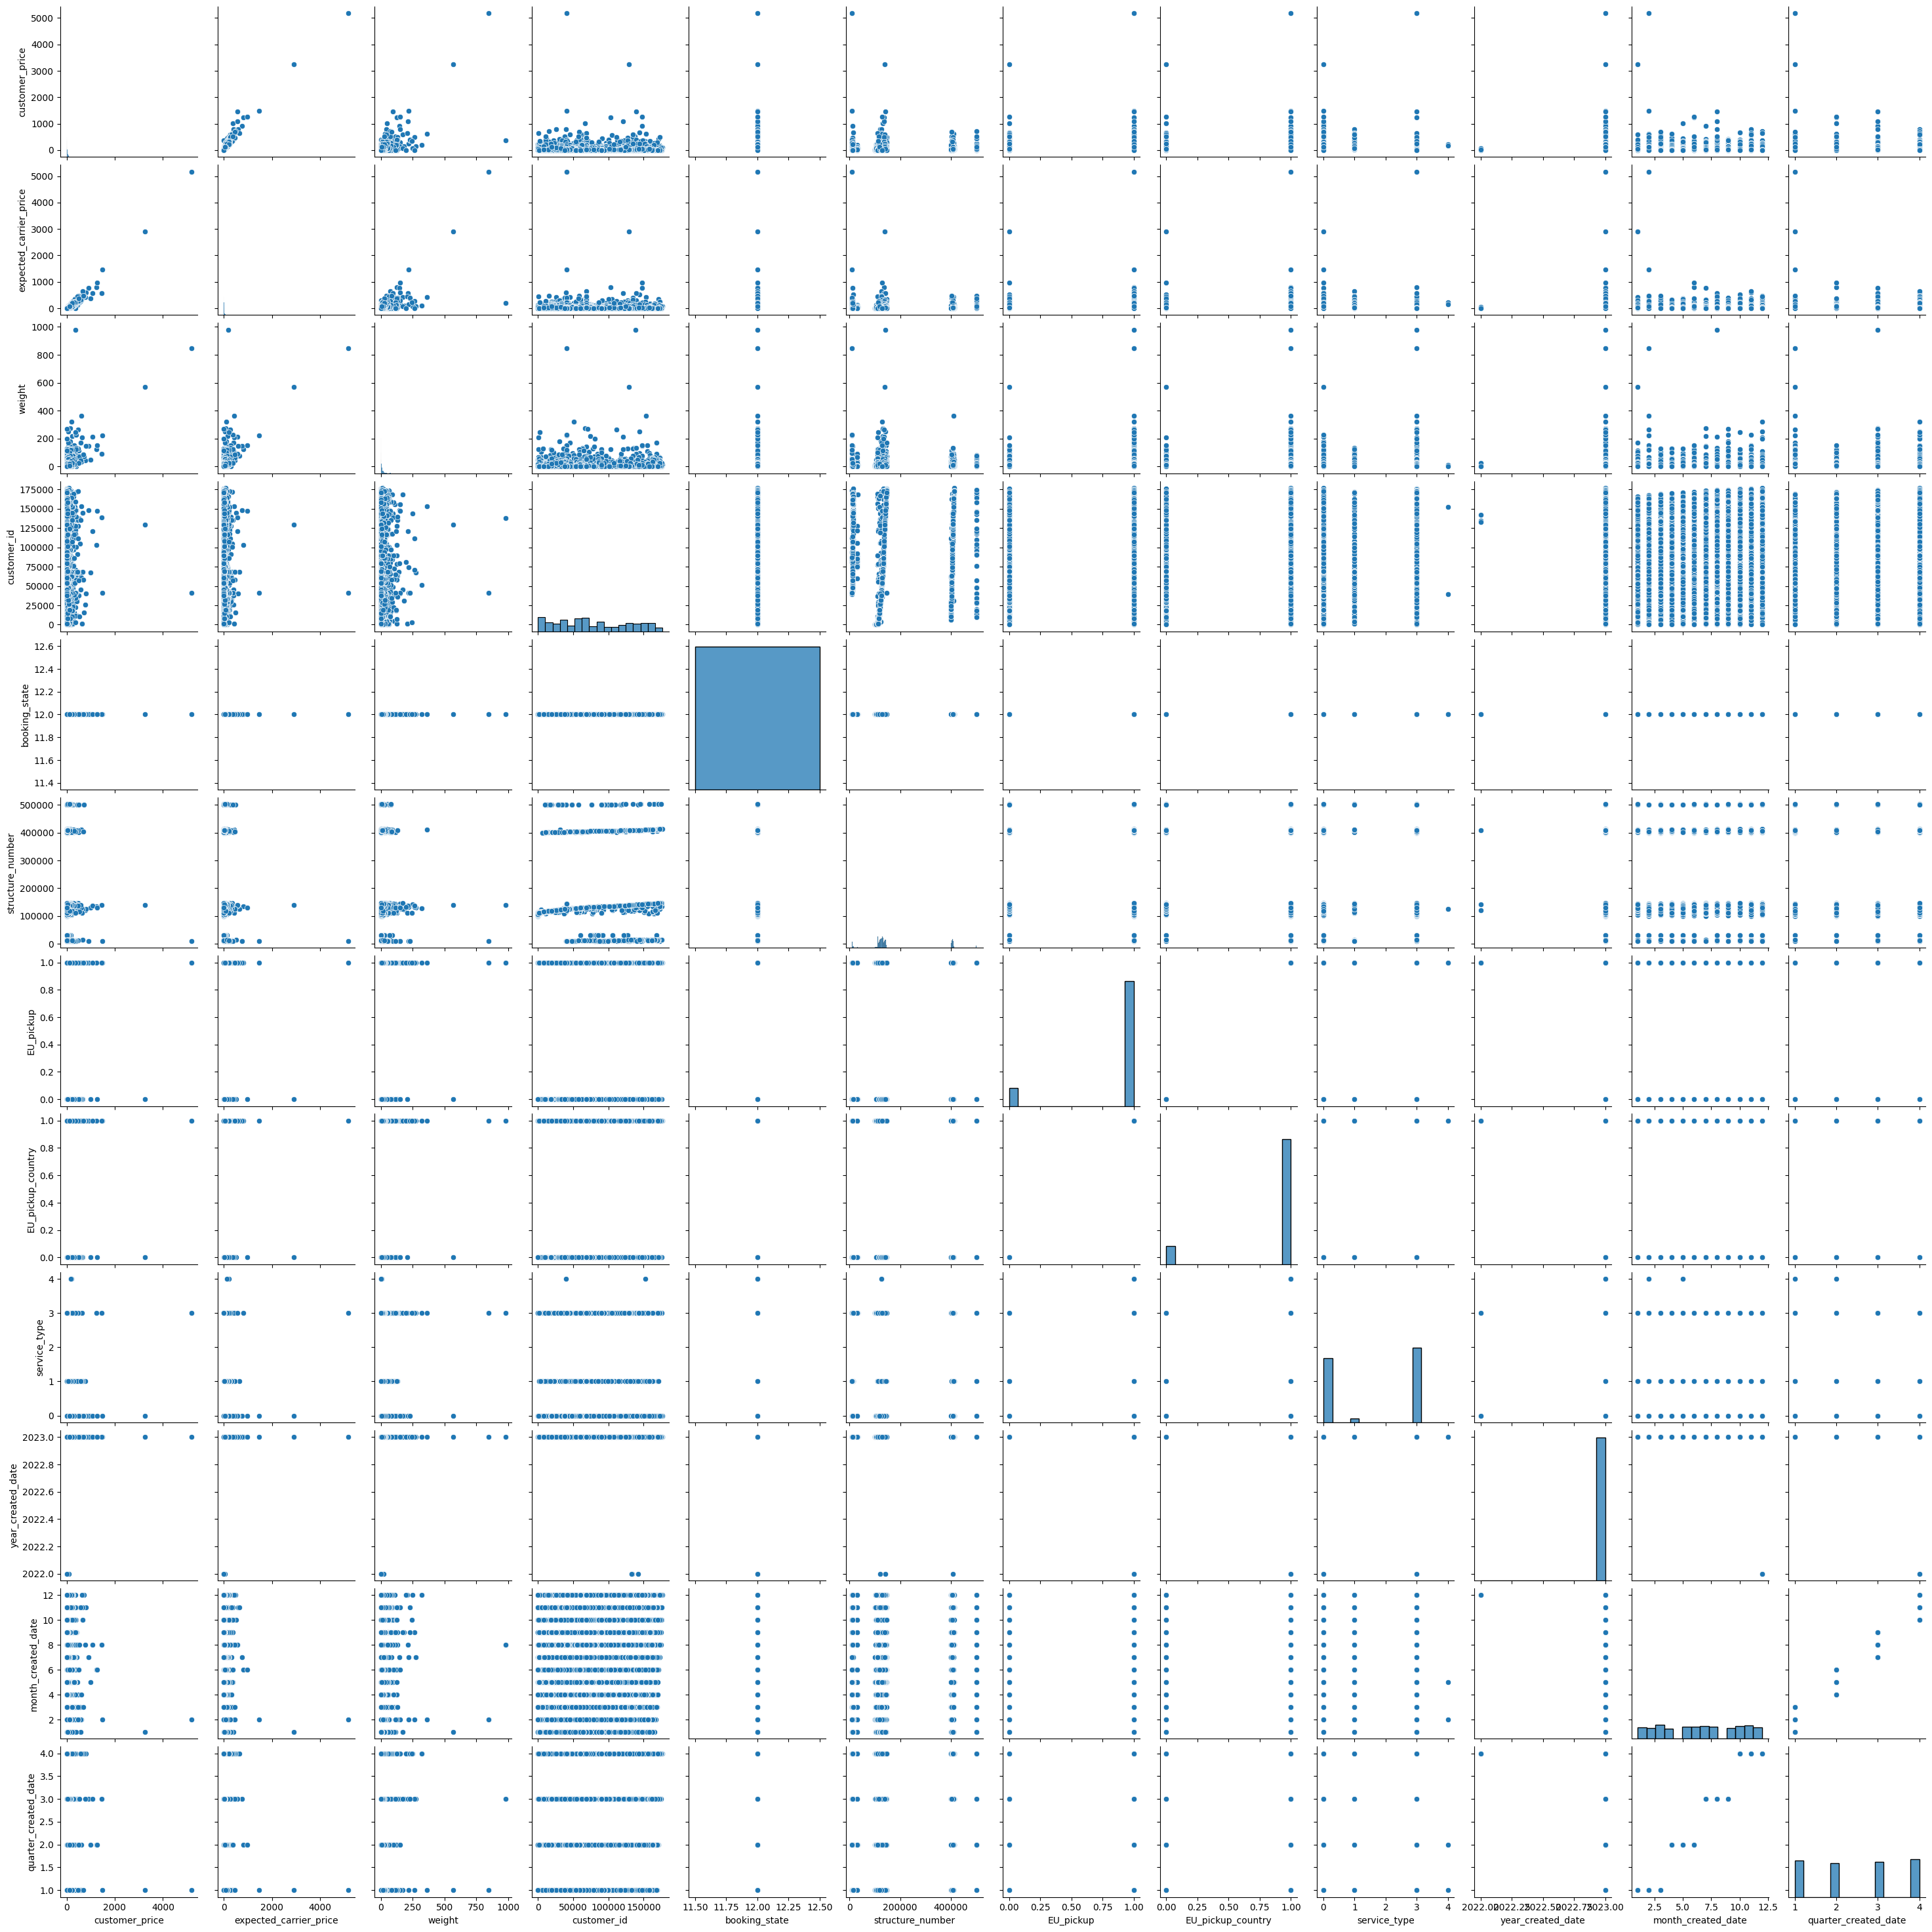

In [20]:
# Pair plot for numerical features (downsample to avoid overload if data is large)
sampled_data = df.sample(5000)  # Sample a subset to avoid overloading the plot
sns.pairplot(sampled_data[numerical_features.columns])
plt.show()

### Target Variable Analysis

In [ ]:
# Plotting the class distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(df['service_type'])
plt.title("Class Distribution of Service Type")
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.show()

### Feature Importance Analysis (initial)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Encode categorical features for RandomForest to run
df_encoded = pd.get_dummies(df.dropna())  # Dropping NA to avoid errors for initial analysis

# Splitting features and target
X = df_encoded.drop('service_type', axis=1)
y = df_encoded['service_type']

# Train a simple RandomForestClassifier for feature importance analysis
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Top 10 Feature Importances (Initial Analysis)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### Correlation with Target Variable

In [ ]:
# Box plots to see how numerical features relate to the target variable
for feature in numerical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['service_type'], y=df[feature])
    plt.title(f"Relationship between {feature} and Service Type")
    plt.xlabel("Service Type")
    plt.ylabel(feature)
    plt.show()

# Preprocessing

## Removing unavailable columns at the moment of the prediction

In [21]:
columns_to_exclude = [
    'created_date_delivery', 'full_date_delivery_date', 'year_delivery_date', 'month_delivery_date',
    'quarter_delivery_date', 'full_date_real_delivery_date', 'year_real_delivery_date',
    'month_real_delivery_date', 'quarter_real_delivery_date',
    'final_carrier_price', 'created_date_carrier',
    'delivery_postal_code', 'delivery_city',
    'margin', 'lms_plus',
    'full_date_pickup_date', 'year_pickup_date', 'month_pickup_date', 'quarter_pickup_date',
    'full_date_real_pickup_date', 'year_real_pickup_date', 'month_real_pickup_date', 'quarter_real_pickup_date',
    'pickup_postal_code', 'pickup_city',
    'created_date_service', 'domain_name_service', 'service_name',
    'carrier_name',
    'segmentation', 'domain_name_customer',
    'transport_type', 'sequence_number', 'shipment_id', 'structure_number'
]


In [ ]:
# Drop the identified columns to prevent label leakage
df = df.drop(columns=columns_to_exclude, axis=1)

## Handling missing values

In [11]:
# columns with NAs (with more than 0)
df.isna().sum()[df.isna().sum() > 0]

,0


In [6]:
# Drop columns with too many missing values (more than 70% missing)
threshold = len(df) * 0.7
df = df.dropna(axis=1, thresh=threshold)

# Fill numeric columns with median and categorical columns with 'missing'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna('missing')

## Feature selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Encode Categorical Target
target_column = 'service_type'
le_target = LabelEncoder()
df[target_column] = le_target.fit_transform(df[target_column])

In [ ]:
# Split Features and Target
X = df.drop([target_column], axis=1)
y = df[target_column]

In [ ]:
# Encoding Strategy for Features
# Split categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply Encoding to Categorical Features
# Label Encoding for high-cardinality features, One-Hot Encoding for low-cardinality features
for col in categorical_cols:
    if X[col].nunique() > 10:  # High cardinality threshold (e.g., >10 unique values)
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    else:
        X = pd.get_dummies(X, columns=[col], drop_first=True)

In [12]:
# Train-Test Split for Feature Selection Purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Feature Selection
# Train a RandomForestClassifier to determine feature importance
rf = RandomForestClassifier(n_estimators=50, random_state=42)  # Reduced number of estimators for simplicity
rf.fit(X_train, y_train)

# Get Feature Importances and Select Important Features
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.01].index.tolist()  # Adjust threshold as needed

# Create Final Dataset with Selected Features
X_selected_train = X_train[important_features]
X_selected_test = X_test[important_features]

# Output the Selected Features
print("Selected Features:", important_features)

Selected Features: ['customer_price', 'expected_carrier_price', 'weight', 'customer_id', 'created_date', 'structure_number', 'name_pickup', 'iso_country_code_pickup', 'created_date_pickup', 'name_pickup_country', 'iso_country_code_pickup_country', 'full_date_created_date', 'month_created_date', 'shipment_type_Parcel', 'continent_pickup_Europe', 'continent_pickup_country_Europe']


## Feature scaling

In [13]:
# Identify numerical features from the selected features
numerical_cols_train = X_selected_train.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_test = X_selected_test.select_dtypes(include=['int64', 'float64']).columns

# Apply Scaling to Numerical Columns
scaler = StandardScaler()

# Fit the scaler on the training set numerical features and transform both training and test set
X_selected_train[numerical_cols_train] = scaler.fit_transform(X_selected_train[numerical_cols_train])
X_selected_test[numerical_cols_test] = scaler.transform(X_selected_test[numerical_cols_test])

# Output to verify that scaling is done
print("Feature scaling applied to the following columns:", numerical_cols_train.tolist())

Feature scaling applied to the following columns: ['customer_price', 'expected_carrier_price', 'weight', 'customer_id', 'created_date', 'structure_number', 'name_pickup', 'iso_country_code_pickup', 'created_date_pickup', 'name_pickup_country', 'iso_country_code_pickup_country', 'full_date_created_date', 'month_created_date']


<ipython-input-13-fd8b06af1180>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_train[numerical_cols_train] = scaler.fit_transform(X_selected_train[numerical_cols_train])
<ipython-input-13-fd8b06af1180>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_test[numerical_cols_test] = scaler.transform(X_selected_test[numerical_cols_test])


# Model Training & Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of models to train
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', multi_class='multinomial'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=1)  # scale_pos_weight used to handle imbalance
}

# Prepare training and test data
X_train, X_test = X_selected_train, X_selected_test
y_train, y_test = y_train, y_test

# Initialize a dictionary to store the results
results = {}

# Train each model in a loop and evaluate its performance
for model_name, model in models.items():
    # Cross-Validation for Robust Evaluation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    # Calculate ROC AUC if possible
    if y_pred_prob is not None:
        roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {model_name}')
        plt.legend(loc='lower right')
        plt.show()
    else:
        roc_auc = None

    # Store the results for comparison
    results[model_name] = {
        "Accuracy": accuracy,
        "Cross-Validation Accuracy": cv_scores.mean(),
        "Cross-Validation Std Dev": cv_scores.std(),
        "Classification Report": class_report,
        "Confusion Matrix": confusion,
        "ROC AUC": roc_auc
    }

    # Print the performance metrics for the model
    print(f"\nModel: {model_name}")
    print(f"Test Set Accuracy: {accuracy:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion)
    print("\n" + "="*60 + "\n")

In [ ]:
# Compare results across models
# Convert the metrics to a DataFrame for easier visualization
comparison_data = []
for model_name, metrics in results.items():
    comparison_data.append([
        model_name,
        metrics["Accuracy"],
        metrics["Cross-Validation Accuracy"],
        metrics["Cross-Validation Std Dev"],
        metrics["ROC AUC"]
    ])

comparison_df = pd.DataFrame(comparison_data, columns=["Model", "Accuracy", "Cross-Validation Accuracy", "Cross-Validation Std Dev", "ROC AUC"])

print("Comparison of Model Performance:")
print(comparison_df)

## Hyperparameter Tuning for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost as xgb

# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=1)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_selected_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters from Grid Search:", best_params)
print("Best Cross-Validation Accuracy from Grid Search:", best_score)

In [ ]:
# Train the XGBoost model using the best parameters
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=1)
best_xgb_model.fit(X_selected_train, y_train)

# Make predictions on the test set
y_pred_best = best_xgb_model.predict(X_selected_test)

# Evaluate the tuned model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)
confusion_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"Test Set Accuracy (Tuned XGBoost): {accuracy_best:.4f}")
print("Classification Report (Tuned XGBoost):")
print(classification_report_best)
print("Confusion Matrix (Tuned XGBoost):")
print(confusion_matrix_best)

# Analysis of Results

In [ ]:
# Print the tuned model's performance metrics
print(f"Test Set Accuracy (Tuned XGBoost): {accuracy_best:.4f}")
print("Classification Report (Tuned XGBoost):")
print(classification_report_best)
print("Confusion Matrix (Tuned XGBoost):")
print(confusion_matrix_best)

# Visualize the confusion matrix to understand misclassifications
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_best, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Tuned XGBoost Model")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## Feature Importance

In [ ]:
# Extract feature importances from the best XGBoost model
importance = best_xgb_model.feature_importances_

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({'Feature': X_selected_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df['Importance'][:10], y=importance_df['Feature'][:10], palette='viridis')
plt.title("Top 10 Feature Importances in Tuned XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("Top 10 Important Features:")
print(importance_df.head(10))